# Chapter 3: Finite Markov Decision Process

## Exercise 3.1
**Q:** Devise three example tasks of your own that fit into the MDP framework, identifying for each its states, actions, and rewards. Make the three examples as <i>different</i> from each other as possible. The framework is abstract and flexible and can be applied in many different ways. Stretch its limits in some way in at least one of your examples

<b>1. Board Game</b>

Consider any board or card game. It's irrelevant whether the transitions are stochastic (i.e. involve a dice roll) or deterministic (i.e. like checkers stone jumps). Both can be captured within the MDP framework.

On the high level a match consists of human players taking turns and choosing from the actions that the game rules allow them to do. The nature of match naturally breaks the problem into episodes terminated by the win, loss or tie. To actually train an agent capable of playing a particular game one needs to equip the game logic with and opponent AI to substitute human players.

Flip side of providing the AI as part of the environment is that the exploitative nature of RL agents can learn particular quirks and bugs of the AI that don't transfer well into matches against humans.
* <b>States:</b> Situation on the game board or the visible cards (grid with values representing the pieces or slots with agent's and dealer's cards)
* <b>Actions:</b> Move available from the current situations (pawn to B2 or hit/stand)
* <b>Transitions:</b> Determined by the game rules. AI substitutes the moves otherwise done by human opponents. AI this way become a part of the environment for the RL agent.
* <b>Rewards:</b> For some games it could be scores implemented by the in-game mechanics or +1/0/-1 for win/tie/loss otherwise

<b>2. Competitive Arms Race Between Two Agents</b>

Consider the MDP as described in the Example 1 but with the opponent AI controlled by another RL agent. Each agent would see the environment exactly as described above but this setup doesn't require pre-programmed AI for training and learning can be achieved by a competitive arms race between the agents.

From the local perspective of an agent the opponent moves can be considered as a part of the environment. And vice versa from the opponent's perspective. Because both agents are learning the environment is non-stationary and changes over time similarly to Exercise 2.11.

If the learning process is carefully tuned and controlled not to progress too quickly it should be possible to achieve optimal play from random initial behavior. It is crucial to keep the win/loss ratio around 50% to prevent one of the agents from learning much faster and exploiting the other one. The agent that would always lose wouldn't receive any meaningful learning signal about the correctness of its actions and there would be no way for it to recover from this state.

<b>3. A Supervised Learning Task</b>

This is in some ways underutilizing and in some ways stretching the MDP concept. Underutilizing lies in the trivial transition dynamics that "feeds" the agent sequentially with the dataset. Stretching is in actions and rewards that represent the desired output of the learner (classification labels or regressed values)

This representation allows any supervised learning problem to be framed as an MDP with the following structure:
* <b>States:</b> Input that would be provided to the learning system (images or feature vectors)
* <b>Actions:</b> Class that the learning system believes that image belongs to or a regressed value
* <b>Transitions:</b> Transition to next sample from the training dataset (following image or next feature vector)
* <b>Rewards:</b> Soft-max or MSE loss of the sample provided as state

## Exercise 3.2
**Q:** Is the MDP framework adequate to usefully represent <i>all</i> goal-directed learning tasks? Can you think of any clear exceptions?


**A:** The MDP framework is adequate for a wide range of goal-directed learning tasks, especially those that can be effectively described through the components of states, actions, and rewards, and where the Markov property holds true. This includes many classic reinforcement learning problems such as navigation, board games, and robotic control tasks. In these problems, the agent's objective can be clearly defined in terms of rewards, and decisions can be made based on the current state and a policy that maps states to actions.

However, there are scenarios where the MDP framework might not be entirely sufficient or the most practical representation for goal-directed learning tasks. Here are some exceptions:
1. **Non-Markovian Environments:** If the task involves significant memory of past events beyond the current state (i.e., the environment is non-Markovian), the basic MDP model might struggle without modifications. For instance, in some strategic games or financial market analysis, the history or sequence of events can be crucial for making optimal decisions.

2. **Partially Observable Environments:** In cases where the agent cannot fully observe the state (partially observable environments), the standard MDP framework needs to be extended to a Partially Observable Markov Decision Process (POMDP). POMDPs handle situations where the agent has to make decisions based on incomplete or noisy observations of the state.

3. **Continuous States and Actions:** While MDPs can theoretically handle continuous states and actions, in practice, solving them directly in continuous spaces can be computationally infeasible without applying approximation techniques or specialized algorithms.

4. **Multi-agent Scenarios:** In environments where multiple agents are learning or optimizing simultaneously, the interactions can make the environment non-stationary from the perspective of any single agent. This situation requires extending the MDP framework to consider the strategies or behaviors of other agents.

5. **Tasks with Complex or Dynamic Reward Structures:** If the reward structure is highly dynamic or depends on long-term strategies that cannot be encapsulated in the immediate reward, modeling such tasks might require more sophisticated approaches than the traditional reward signals in MDPs.

## Exercise 3.3
**Q:** Consider the problem of driving. You could define the actions in terms of the accelerator, steering wheel, and brake, that is, where your body meets the machine. Or you could define them farther out - say, where the rubber meets the road, considering your actions to be tire torques. Or you could define them farther in - say, where your brain meets your body, the actions being muscle twitches to control your limbs. Or you could go to a really high level and say that your actions are your choices of _where_ to drive. What is the right level, the right place to draw the line between agent and environment? On what basis is one location of the line to be preferred over another? Is there any fundamental reason for preferring one location over another, or is it a free choice?

**A:** First, it’s essential to acknowledge that the level of abstraction for defining actions can significantly influence the complexity of the learning task, the interpretability of the model, and its applicability to real-world scenarios. The example of driving illustrates a spectrum of abstraction levels, from the very concrete (muscle twitches controlling limbs) to the highly abstract (choices of destinations).

The "right" level of abstraction depends on several factors, which include:
1. **Task Specificity and Objectives:** If the goal is to learn fine-grained control, a lower level of abstraction (e.g., muscle twitches) might be necessary. Conversely, for strategic decision-making tasks, a higher level of abstraction (e.g., choosing destinations) could be more appropriate.
2. **Complexity and Feasibility:** Lower abstraction levels often lead to more complex models with higher dimensional state and action spaces, which can make learning more challenging. Choosing an abstraction level that balances model complexity and learning feasibility is crucial.
3. **Generalizability:** Higher levels of abstraction may allow for solutions that are more easily transferred across different tasks or environments, as they abstract away from the specifics of a particular interface or set of controls.
4. **Data and Computation Resources:** The availability of data and computational resources can also influence the choice. More abstract models might require less detailed data and could be computationally less expensive to train.
5. **Interpretability and Explainability:** The level of abstraction impacts the interpretability of the learned policies. Higher abstraction levels might result in policies that are easier for humans to understand and relate to, which can be particularly important in domains requiring human interaction or oversight.

There is no universally "right" level of abstraction that applies to all problems. The choice of abstraction level is contingent upon the specific requirements and constraints of the task at hand. Additionally, the decision might be influenced by the existing body of research, available models, and the state of technology in the relevant fields.

In conclusion, the choice of where to draw the line between the agent and the environment in defining actions is not a free choice but rather a deliberate decision that impacts the design and effectiveness of RL systems. It is guided by a balance of task requirements, model complexity, generalizability, and practical constraints. As such, the selection process is highly context-dependent, emphasizing the importance of clear objectives and thoughtful consideration of the factors involved.

## Exercise 3.4
**Q:** Give a table analogous to that in Examle 3.3, but for _p(s', r_ | _s, a)_. It should have columns for _s, a, s', r_, and _p(s', r_ | _s, a)_, and a row for every 4-tuple for which _p(s', r_ | _s, a)_ > 0

**A:**
| _s_  |    _a_   | _s'_ |        _r_        | _p(s', r_ / _s, a)_ |
|------|----------|------|-------------------|---------------------|
| high |  search  | high | r<sub>search</sub>|       $\alpha$      |
| high |  search  | low  | r<sub>search</sub>|    1 - $\alpha$     |
| low  |  search  | high |        -3         |     1 - $\beta$     |
| low  |  search  | low  | r<sub>search</sub>|        $\beta$      |
| high |   wait   | high | r<sub>wait</sub>  |           1         |
| low  |   wait   | low  | r<sub>wait</sub>  |           1         |
| low  | recharge | high |         0         |           1         |

## Exercise 3.5
**Q:** The equations in Section 3.1 are for the continuing case and need to be modified (very slightly) to apply to episodic tasks. Show that you know the modifications needed by giving the modified version of (3.3)

**A:**
Original (3.3) equation for continuing case:

$\sum_{s' \in S}\sum_{r \in R} p(s', r | s, a) = 1 $, for all $s \in S, a \in A(s)$

Modified equation for episodic tasks:

$\sum_{s' \in S^+}\sum_{r \in R} p(s', r | s, a) = 1 $, for all $s \in S^+, a \in A(s)$

## Exercise 3.6
**Q:** Suppose you treated pole-balancing as an episodic task but also used discounting, with all rewards zero except for -1 upon failure. What then would the return be at each time? How does this return differ from that in the discounted, continuing formulation of this task?

**A:** In the episodic formulation with discounting, all rewards are zero except for a -1 reward upon failure, which signifies the end of an episode. Let's denote the time of failure as $T$, which is when the pole falls over or the cart moves out of bounds. Since rewards are zero for each time step except for the failure at time $T$, the return $G_t$ from a time step t is determined solely by the negative reward received at the end of the episode, discounted by how far in the future this reward occurs from $t$.

The return at time $t$, considering the discount rate is $\gamma$, can be calculated as:

$G_t = -\gamma^{T-t}$

This equation reflects that the only reward that contributes to the return is the -1 received at time T, and it's discounted by $\gamma^{T-t}$, the number of time steps between $t$ and $T$.

Whereas in the continuing case the value:

$G_t = -\sum_{k \in \kappa} \gamma^{k-t}$

where $\kappa$ is the set of times after t at which the pole falls over.

## Exercise 3.7
**Q:** Imagine that you are designing a robot to run a maze. You decide to give it a reward of +1 for escaping from the maze and a reward of zero at all other times. The task seems to break down naturally into episodes - the successive runs through the maze - so you decide to treat it as an episodic task, where the goal is to maximize expected total reward (3.7). After running the learning agent for a while, you find that it is showing no improvement in escaping from the maze. What is going wrong? Have you effectively communicated to the agent what you want it to achieve?

**A:** The primary issue seems to stem from the reward structure, which provides very sparse feedback to the agent. Since the agent only receives a reward upon successfully escaping the maze, it has very little information to learn from during the majority of its exploration. This makes it difficult for the agent to associate its actions with positive outcomes, particularly if escaping the maze is a rare event.

Without intermediate rewards or penalties, the agent lacks a "gradient" or direction to guide its exploration towards quicker or more efficient escape routes. Essentially, every action taken inside the maze that does not lead directly to an escape is treated the same, offering no incremental learning signals to the agent about which actions might be better or worse.

When rewards are sparse and only given at the end of an episode, it introduces a delayed reward scenario, which exacerbates the credit assignment problem. The agent struggles to understand which actions were responsible for the eventual escape, especially if the escape occurs after a long sequence of actions with no immediate feedback.

To more effectively communicate the desired objective to the agent and encourage learning, let's consider the following adjustments to the reward structure:

* **Intermediate Rewards:** Introduce smaller, intermediate rewards for actions that lead the agent closer to the goal. This could involve rewarding the agent for reaching certain checkpoints within the maze or for actions that reduce its distance to the exit.

* **Penalties for Inefficiency:** Implement a small negative reward (penalty) for each action taken within the maze. This encourages efficiency by penalizing unnecessary moves, thereby guiding the agent to find quicker escape routes. However, care must be taken to balance this so as not to discourage exploration.

* **Graduated Rewards:** Consider a system where rewards increase as the agent approaches the maze exit. This creates a stronger signal for actions that lead in the right direction and can help guide the agent's learning process more effectively.

## Exercise 3.8
**Q:** Suppose $\gamma = 0.5$ and the following sequence of rewards is received $R_1 = -1, R_2 = 2, R_3 = 6, R_4 = 3$, and $R_5 = 2$, with $T = 5$. What are $G_0, G_1$, ..., $G_5$? Hint: Work backwards.

**A:**

Considering (3.9):

$G_t \dot{=} R_{t + 1} + \gamma R_{t + 2} + \gamma^2 R_{t + 3} + \cdots = \sum_{k = 0}^\infty \gamma^k R_{t + k + 1} = R_{t+1} + \gamma G_{t + 1}$

Then

$G_5 = 0$

$G_4 = R_5 + \gamma G_5 = 2 + 0.5 * 0 = 2 $

$G_3 = R_4 + \gamma G_4 = 3 + 0.5 * 2 = 4 $

$G_2 = R_3 + \gamma G_3 = 6 + 0.5 * 4 = 8 $

$G_1 = R_2 + \gamma G_2 = 2 + 0.5 * 8 = 6 $

$G_0 = R_1 + \gamma G_1 = -1 + 0.5 * 6 = 2 $

## Exercise 3.9
**Q:** Suppose $\gamma = 0.9$ and the reward sequence is $R_1 = 2$ followed by an infinite sequence of 7s. What are $G_1$ and $G_0$

**A:**

Considering (3.10):

$ G_t = \sum_{k = 0}^\infty \gamma^k = \frac{1}{1 - \gamma}$

Then

$ G_1 = 7 \sum_{k = 0}^\infty 0.9^k = \frac{7}{1 - 0.9} = 70$

$ G_0 = R_1 + \gamma G_1 = 2 + 0.9 * 70 = 65 $

## Exercise 3.10
**Q:** Prove the second equality in 

$ G_t = \sum_{k = 0}^\infty \gamma^k = \frac{1}{1 - \gamma}$

**A:** Given a geometric series with a common ratio $\gamma$, the sum of the first $n + 1$ terms is given by:

$ S_n = \sum_{k = 0}^n \gamma^k = 1 + \gamma + \gamma^2 + \cdots + \gamma^n $

Multiplying both sides of this equation by $\gamma$ gives:

$ \gamma S_n = \gamma + \gamma^2 + \gamma^3 + \cdots + \gamma^{n + 1} $

Subtracting the second equation from the first gives:

$ S_n - \gamma S_n = 1 - \gamma^{n + 1} $

Solving for $S_n$ yields:

$ S_n = \frac{1 - \gamma^{n + 1}}{1 - \gamma} $

As $n$ approaches infinity, and given that $|\gamma| < 1, \gamma^{n + 1}$ approaches 0. Therefore, the sum of the infinite series is:

$ \displaystyle \lim_{n \to \infty} S_n = \displaystyle \lim_{n \to \infty} \frac{1 - \gamma^{n + 1}}{1 - \gamma} = \frac{1}{1 - \gamma}$

## Exercise 3.11
**Q:** If the current state is $S_t$, and actions are selected according to stochastic policy $\pi$, then what is the expectation of $R_{t+1}$ in terms of $\pi$ and the four-argument function $p$?

**A:** 

$\mathop{\mathbb{E}}[R_{t+1}|S_t = s] = \sum_{a \in A(s)} \pi(a|s) \sum_{s' \in S}\sum_{r \in R} r \cdot p(s', r|s, a)  $

where
* $\pi(a|s)$ is the probability of taking action $a$ in state $s$ according to the policy $\pi$.
* $p(s', r|s, a)$ is the probability of moving to state $s'$ and receiving reward $r$ after taking action $a$ in state $s$.
* The innermost sum $\sum_{r \in R} r \cdot p(s', r|s, a)$ calculates the expected reward for a given action $a$ and state transition $s$ to $s′$, by summing over all possible rewards $r$, each weighted by its probability.
* The outer sums iterate over all actions $a$ that can be taken in state $s$ and all possible next states $s'$, combining the expectations across all actions and transitions according to the policy $\pi$.

## Exercise 3.12
**Q:** Give an equation for $v_\pi$ in terms of $q_\pi$ and $\pi$

**A:**

$ v_\pi(s) = \sum_{a \in A} \pi(a|s) \cdot q_\pi(s, a) $

## Exercise 3.13
**Q:** Give an equation for $q_\pi$ in terms of $v_\pi$ and the four-argument $p$

**A:**

$ q_\pi(s, a) = \sum_{s' \in S} \sum_{r \in R} p(s', r|s, a)[r + \gamma v_\pi(s')] $

where the term $ r + \gamma v_\pi(s')$ represents the total expected return from taking action $a$ in state $s$, where $r$ is the immediate reward for the transition, and $\gamma v_\pi(s')$ is the discounted value of the subsequent state $s$ according to policy $\pi$. Here, $\gamma$ is the discount factor that weights the importance of future rewards.

## Exercise 3.14
**Q:** The Bellman equation (3.14):

$ v_\pi(s) = \sum_{a \in A} \pi(a|s) \sum_{s' \in S} \sum_{r \in R} p(s', r|s, a)[r + \gamma v_\pi(s')] $

must hold for each state for the value function $v_\pi$ shown in Figure 3.2 (right) of Example 3.5. Show numerically that this equation holds for the center state, valued at +0.7, with respect to its four neighboring states, valued at +2.3, +0.4, -0.4 and +0.7.

**A:** 

$ v_\pi(s) = 0.25 \cdot 0.9 (2.3 + 0.4 - 0.4 + 0.7) = 0.675 \approx 0.7 $ for the central state

## Exercise 3.15
**Q:** In the gridworld example, rewards are positive for goals, negative for running into the edge of the world, and zero the rest of the time. Are the signs of these rewards important, or only the intervals beetwen them? Prove, using (3.8), that adding a constant $c$ to all the rewards adds a constant, $v_c$, to the values of all states, and thus does not affect the relative values of any states under any policies. What is $v_c$ in terms of $c$ and $\gamma$?

**A:** According to the (3.8):

$G_t \dot= R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \cdots = \sum_{k=0}^\infty \gamma^k R_{t+k+1} $

If we add a constant $c$ to every reward, then every $R_i$ becomes $R_i + c$. The modified return is:

$ G'_t = \sum_{k = 0}^\infty \gamma^k (R_{t + k + 1} + c) = \sum_{k = 0}^\infty \gamma^k R_{t + k + 1} + \sum_{k = 0}^\infty \gamma^k c $

where the first sum is the original return G_t. The second sum represents a geometric series where each term is $c$, multiplied by \gamma^k. The sum of this series is:

$ \sum_{k = 0}^\infty \gamma^k c = c \sum_{k = 0}^\infty \gamma^k = c \frac{1}{1 - \gamma} $

Therefore, the modified return is:

$ G'_t = G_t + \frac{c}{1 - \gamma} $

The value function $v_\pi(s)$ under a policy $\pi$ for any state $s$ is the expected return starting from $s$ and following $\pi$. If adding $c$ to every reward increases the return $G_t$ by $\frac{c}{1 - \gamma}$ for any sequence of rewards, then it similarly increases $v_\pi(s)$ by a constant amount for all states $s$, because $v_\pi(s)$ is an expectation of $G_t$.

Thus, when a constant $c$ is added to all rewards, the value of all states under any policy $\pi$ increases by the same constant:

$ v_c = \frac{c}{1 - \gamma} $

## Exercise 3.16
**Q:** Now consider adding a constant $c$ to all the rewards in an episodic task, such as maze running. Would this have any effect, or would it leave the task unchanged as in the continuing task above? Why or why not? Give an example.

**A:** When considering the impact of adding a constant $c$ to all rewards in an episodic task, such as maze running, the situation differs from the continuing tasks discussed previously. In an episodic task, episodes have a definite start and end, and the cumulative return from a starting state to the terminal state is what the agent seeks to maximize.

Adding a constant $c$ to all rewards in an episodic task does affect the task differently than in continuing tasks. The reason lies in the finite nature of episodes and how returns are calculated:
* Since episodes end, the return $G_t$ is a finite sum of rewards. Adding a constant $c$ to every reward increases the return for an episode, but because the number of steps to reach the terminal state can vary, the increase in total return will depend on the length of the episode.
* This can inadvertently create an incentive for policies that prolong episodes since the longer an episode, the larger the increase in total return due to the addition of $c$ at each step. This contrasts with the goal of episodic tasks like maze running, where efficiency (e.g., finding the shortest path to the goal) is often desired.

## Exercise 3.17
**Q:** What is the Bellman equation for action values, that is, for $q_\pi$? It must give the action value $q_\pi(s, a)$ in terms of the action values, $q_\pi(s', a')$, of possible successors to the state-action pair (s, a). Hint: the backup diagram to the right corresponds to this equation. Show the sequence of equations to (3.14), but for action values.

**A:** The action value function under policy $\pi$ for a state-action pair $(s, a)$ is the expected return starting from $s$, taking action $a$, and thereafter following policy $\pi$:

$ q_\pi(s, a) = \mathop{\mathbb{E}}_\pi[G_t|S_t = s, A_t = a] = \mathop{\mathbb{E}}_\pi[R_{t+1} + \gamma G_{t+1} | S_t = s, A_t = a] $

Incorporating the environment's dynamics through the four-argument function and the policy $\pi$, the equation becomes:

$ q_\pi(s, a) = \sum_{s', r'} p(s', r|s, a) [r + \gamma \mathop{\mathbb{E}}_\pi [G_{t+1}|S_{t+1} = s']] $

To express the expectation of future returns in terms of action values, note that $\mathop{\mathbb{E}}_\pi [G_{t+1}|S_{t+1} = s']$ is the expected return from $s'$, which involves averaging over all actions $a'$ that might be taken in $s'$:

$ q_\pi(s, a) = \sum_{s', r} p(s', r|s, a) [r + \gamma \sum_{a'} \pi(a'|s')q_\pi(s', a')] $

## Exercise 3.18
**Q:** The value of a state depends on the values of the actions possible in that state and on how likely each action is to be taken under the current policy. We can think of this in terms of a small backup diagram rooted at the state and considering each possible action:
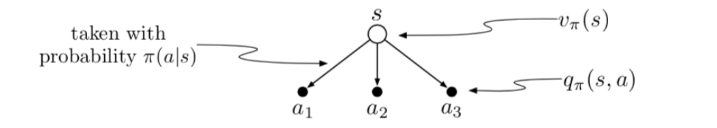
Give the equation corresponding to this intuition and diagram for the value at the root node, $v_\pi(s)$, in terms of the value at the expected leaf node, $q_\pi(s, a)$, given $S_t = s$. This equation should include an expectation conditioned on following the policy, $\pi$. Then give a second equation in which the expected value is written out explicitly in terms of $\pi(a|s)$ such that no expected value notation appears in the equation.

**A:** The first equation can be expressed as the average of the action values weighted by the probability of taking each action under policy $\pi$, given the current state $s$. Here, $q_\pi(s, A_t)$ is the action value when action $A_t$ is chosen under policy $\pi$ in state $s$

$ v_\pi(s) = \mathop{\mathbb{E}}_\pi[q_\pi(s, A_t)|S_t = s] $

In this second equation, the expectation is made explicit. For each action $a$ that can be taken in state $s$, we multiply the probability of taking that action under policy $\pi$ by the value of taking that action, which is $q_\pi(s, a)$, and sum over all actions:

$ v_\pi(s) = \sum_{a \in A}\pi(a|s) \cdot q_\pi(s, a) $

## Exercise 3.19
**Q:** The value of an action, $q_\pi(s, a)$, depends on the expected next reward and the expected sum of the remaining rewards. Again we can think of this in terms of a small backup diagram, this one rooted at an action (state-action pair) and branching to the possible next states:

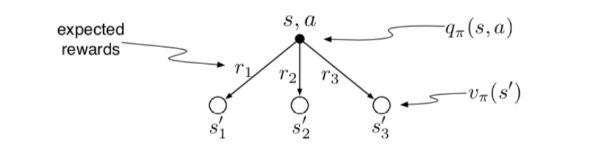

Give the equation corresponding to this intuition and diagram for the action value, $q_\pi(s, a)$, in terms of  expected next reward $R_{t+1}$, and the expected next state value, $v_\pi(S_{t+1})$, given that $S_t = s$ and $A_t = a$. This equation should include an expectation but not one conditioned on following the policy. Then give a second equation, writing out the expected value explicitly in terms of $p(s', r|s, a)$ defined by (3.2), such that no expected value notation appears in the equation.

**A:** 
1) $ q_\pi(s, a) = \mathop{\mathbb{E}}[R_{t+1} + \gamma v_\pi(S_{t+1}) | S_t = s, A_t = a] $
2) $ q_\pi(s, a) = \sum_{s' \in S} \sum_{r \in R} p(s', r | s, a)[r + \gamma v_\pi(s')] $

## Exercise 3.20
**Q:** Draw or describe the optimal state-value function for the golf example

**A:**

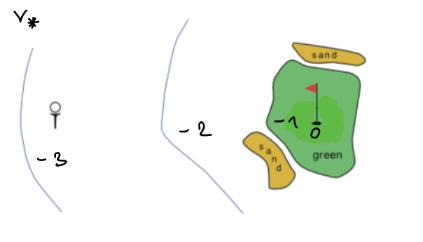


The optimal state value function equals to $q_*(s, driver)$ everywhere but for the green area. In the green area, it's best to use the putter to have more chance to reach the hole in one shot

## Exercise 3.21
**Q:** Draw or describe the contours of the optimal action-value function for putting, $q_*(s, putter)$, for the gold example.

**A:** 

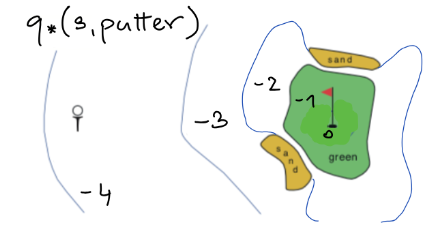

The optimal action-value function for the putter equals $v^*$ minus one extra shot for the first putter shot in a region far from the green. When in the region within putting range $q_*$ equals to $q(s, putter)$ as putting is the best course of action from this region onwards

## Exercise 3.22
**Q:** 

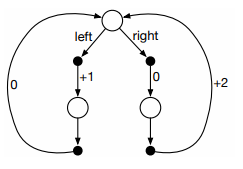

Consider the continuing MDP shown on to the right. The only decision to be made is that in the top state, where two actions are available, left and right. The numbers show the rewards that are received deterministically after each action. There are exactly two deterministic policies, $\pi_{left}$ and $\pi_{right}$. What policy is optimal if $\gamma = 0$? If $\gamma = 0.9$? If $\gamma = 0.5$?

**A:** To determine which policy is optimal under different discount factors $\gamma$., we need to compare the expected returns for each policy given the different values of $\gamma$.

#### $\gamma = 0$:
Future rewards are not considered at all; only immediate rewards matter. Therefore, the optimal policy is simply the one with the higher immediate reward.
* $\pi_{left}$ yields an immediate reward of +1
* $\pi_{right}$ yields and immediate reward of +0

Thus $\pi_{left}$ is the optimal policy.

#### $\gamma = 0.9$
For this discount rate, future rewards are heavily considered. The expected return for each policy is a sum of the immediate reward plus the discounted future rewards.
* $\pi_{left}$ yields +1 with every two steps starting from the 1st action. The expected return would be:</br>
$ G_{left} = 1 + \gamma^2 \cdot 1 + \gamma^4 \cdot 1 + \dots = 1 \cdot \sum_{k = 0}^\infty (\gamma^2)^k = 1 \cdot \frac{1}{1 - \gamma^2} = \frac{1}{1 - 0.81} = \frac{1}{0.19} \approx 5.26 $
* $\pi_{right}$ yields +2 with every two steps starting from the 2nd action. The expected return:
$ G_{right} = \gamma \cdot 2 + \gamma^3 \cdot 2 + \gamma^5 \cdot 2 + \dots = 2\gamma \cdot \sum_{k = 0}^\infty (\gamma^2)^k = 2\gamma \cdot \frac{1}{1 - \gamma^2} = 2 \cdot 0.9 \cdot \frac{1}{0.19} = \frac{1.8}{0.19} \approx 9.47 $

So for $\gamma = 0.9, \pi_{right}$ is the optimal policy. 

#### $\gamma = 0.5$
For this discount rate, let's again calculate the expected returns. Using the previous formulas and plugging in $\gamma = 0.5$, we get:
* $ G_{left} = \frac{1}{1 - 0.25} = \frac{1}{0.75} = 1.(3) $
* $ G_{right} = 2 \cdot 0.5 \cdot \frac{1}{0.75} = 2 \cdot 0.5 \cdot 1.(3) = 1.(3) $

And we can see that for $\gamma = 0.5$, both policies yields the same expected return, so both can be considered optimal.

## Exercise 3.23
**Q:** Give the Bellman equation for $q_*$ for the recycling robot.

**A:**

$ q_*(h, s) = p(h | h, s)[r(h, s, h) + \gamma \max_a q_*(h, a)] + p(l | h, s)[r(h, s, l) + \gamma \max_a q_*(l, a)] = \alpha [r_s + \gamma \max_a q_*(h, a)] + (1 - \alpha)[r_s + \gamma \max_a q_*(l, a) = r_s + \alpha \gamma (\max_a q_*(h, a) - \max_a q_*(l, a)) $

$ q_*(h, w) = p(h | h, w) [r(h, w, h) + \gamma max_a q_*(h, a)] + p(l | h, w) [r(h, w, l) + \gamma \max_a q_*(l, a)] = 1[r_w + \gamma max_a q_*(h, a)] + 0[r_w + \gamma \max_a q_*(l, a)] = r_w + \gamma max_a q_*(h, a) $

$ q_*(l, s) = p(h | l, s)[r(l, s, h) + \gamma \max_a q_*(h, a)] + p(l | l, s)[r(l, s, l) + \gamma \max_a q_*(l, a)] = (1 - \beta) [-3 + \gamma \max_a q_*(h, a)] + \beta[r_s + \gamma \max_a q_*(l, a) = \beta r_s - 3(1 - \beta) + \gamma[(1 - \beta)\max_a q_*(h, a) + \beta \max_a q_*(l, a)] $

$ q_*(l, w) = p(h | l, w) [r(l, w, h) + \gamma max_a q_*(h, a)] + p(l | l, w) [r(l, w, l) + \gamma \max_a q_*(l, a)] = 0[r_w + \gamma max_a q_*(h, a)] + 1[r_w + \gamma \max_a q_*(l, a)] = r_w + \gamma max_a q_*(l, a) $

$ q_*(l, re) = p(h | l, re) [r(l, re, h) + \gamma max_a q_*(h, a)] + p(l | l, re) [r(l, re, l) + \gamma \max_a q_*(l, a)] = 1[0 + \gamma max_a q_*(h, a)] + 0[0 + \gamma \max_a q_*(l, a)] = \gamma max_a q_*(h, a) $

## Exercise 3.24
**Q:** Figure 3.5 gives the optimal value of the best state of the gridworld as 24.4, to one decimal place. Use your knowledge of the optimal policy and (3.8) to express this value symbolically, and then to compute it to three decimal places.

**A:** -

## Exercise 3.25
**Q:** Give an equation for $v_*$ in terms of $q_*$

**A:** $v_*(s) = \max_a q_*(s, a) $

## Exercise 3.26
**Q:** Give an equation for $q_*$ in terms of $v_*$ and the four-argument $p$

**A:** $ q_*(s, a) = \sum_{s', r} p(s', r | s, a) [r + \gamma \max_{a'} v_*(s')] $

## Exercise 3.27
**Q:** Give an equation for $\pi_*$ in terms of $q_*$

**A:** $ \pi_*(s) = \arg\max_a q_*(s, a) $

## Exercise 3.28
**Q:** Give an equation for $\pi_*$ in terms of $v_*$ and the four-argument $p$

**A:** $ \pi_*(s) = \arg\max_a \sum_{s', r} p(s', r | s, a) [r + \gamma v_*(s')] $

## Exercise 3.29
**Q:** Rewrite the four Bellman equations for the four value functions ($v_\pi, v_*, q_\pi$ and $q_*$) in terms of the three argument function $p$ (3.4) and the two-argument function $r$ (3.5)

**A:** 

#### For $v_\pi(s)$ (State-Value Function for Policy $\pi$):
Original Equation in terms of the four-argument function $p(s', r | s, a)$:

$ v_\pi(s) = \sum_a \pi(a|s) \sum_{s', r} p(s', r | s, a) [r + \gamma v_\pi(s')] $

Rewritten in terms of $p(s' | s, a)$ an $r(s, a)$:

$ v_\pi(s) = \sum_a \pi(a|s) \sum_{s'} p(s' | s, a) [r(s, a) + \gamma v_\pi(s')] $
<br/><br/>

#### For $v_*(s)$ (Optimal State-Value Function):
Original Equation in terms of the four-argument function $p(s', r | s, a)$:

$ v_*(s) = \max_a \pi(a|s) \sum_{s', r} p(s', r | s, a) [r + \gamma v_*(s')] $

Rewritten in terms of $p(s' | s, a)$ an $r(s, a)$:

$ v_*(s) = \max_a \pi(a|s) \sum_{s'} p(s' | s, a) [r(s, a) + \gamma v_*(s')] $
<br/><br/>

#### For $q_\pi(s, a)$ (Action-Value Function for Policy $\pi$):
Original Equation in terms of the four-argument function $p(s', r | s, a)$:

$ q_\pi(s, a) = \sum_{s', r} p(s', r | s, a) [r + \gamma \sum_{a'} \pi(a'|s') q_\pi(s', a')] $

Rewritten in terms of $p(s' | s, a)$ an $r(s, a)$:

$ q_\pi(s, a) = \sum_{s'} p(s' | s, a) [r(s, a) + \gamma \sum_{a'} \pi(a'|s') q_\pi(s', a')] $
<br/><br/>

#### For $q_*(s, a)$ (Optimal Action-Value Function):
Original Equation in terms of the four-argument function $p(s', r | s, a)$:

$ q_*(s, a) = \sum_{s', r} p(s', r | s, a) [r + \gamma \max_{a'} q_*(s', a')] $

Rewritten in terms of $p(s' | s, a)$ an $r(s, a)$:

$ q_*(s, a) = \sum_{s'} p(s' | s, a) [r(s, a) + \gamma \max_{a'} q_*(s', a')] $